# Wstęp do Sztucznej Inteligencji - rok akademicki 2022/2023

Przed rozpoczęciem pracy z notatnikiem zmień jego nazwę zgodnie z wzorem: `NrAlbumu_Nazwisko_Imie_PoprzedniaNazwa`.

Przed wysłaniem notatnika upewnij się, że rozwiązałeś wszystkie zadania/ćwiczenia.

# Temat: Sztuczne Sieci Neuronowe - Lab 1 - Perceptron

## Sztuczna komórka nerwowa
Za pierwszy model sieci neuronowej uważa sie zainspirowany modelem biologicznym, model neuronu zaproponowany przez W. McCullacha i W. Pittsa w 1943 roku. Był to prosty neuron zdefiniowany jako układ z pewnym progiem wrażliwości posiadającym dwa typy wejść: pobudzające i hamujące. Założono, że układ ten może przyjmować tylko dwa stany: aktywny bądź nieaktywny.
![neuron.png](http://torus.uck.pk.edu.pl/~amarsz/images/neuronl.png)

Model neuronu McCullacha-Pittsa przedstawiony na powyższym rysunku, można opisać zależnością
$$y = f\left(\sum\limits_{i=1}^N{w_ix_i}+w_0\right)$$
gdzie:

- funkcja $f(\cdot)$ jest funkcją aktywacji neuronu,
- wartości $x_i$ są sygnałami wejściowymi,
- współczynniki $w_i$ są wagami połączeń synaptycznych,
- współczynnik $w_0$ jest progiem wrażliwości neuronu (tzw. biasem).

W oryginalnym modelu McCullocha-Pittsa jako funkcji aktywacji użyto funkcji skokowej, a dokładniej pseudofunkcji Heaviside’a
$$ f(u) = \left\{\begin{array}{l}
1, \quad u \geq 0,\\
0, \quad u<0.\end{array}\right.$$

## Perceptron
Model neuronu McCullacha-Pittsa opisany powyżej z odpowiednio dobraną strategią uczenia nazywany jest _perceptronem Rosenblatta_ lub krótko _perceptronem_.

Niech wektory sygnałów wejściowych oraz wartości wag będą odpowiednio postaci $x = [1, x_1, x_2, \ldots, x_N]$ oraz
$w = [w_0, w_1, \ldots, w_N]$. Do wektora $x$ dołączono składową zerową $x_0 = 1$, stanowiącą sygnał polaryzacji, natomiast wartość wagi $w_0$ jest progiem wrażliwości neuronu (biasem). 

Wówczas model perceptronu możemy zapisać w postaci
$$y = f(u) = f\left(\sum\limits_{i=0}^N{w_ix_i}\right)$$

### Zastosowania prerceprtronu
Perceptron na wyjściu zgodnie z funkcją aktywacji może przyjmować tylko dwie wartości 0 lub 1, wobec tego może on zostać wykorzystany do klasyfikacji wzorców pochodzących z dwóch różnych klas. Jeśli wartość sumatora jest dodatnia to wzorzec zostanie zaklasyfikowany do klasy 1, w przeciwnym przypadku będzie to klasa 0.

Rozważmy problem w przestrzeni dwuwymiarowej ($N = 2$), wówczas perceptron odseparowuje klasy od siebie za pomocą linii prostej (w dowolnym wymiarze jest to ($N − 1$)-wymiarowa hiperpłaszczyzna) danej równaniem
$$w_0x_0+w_1x_1+w_2x_2=0,$$
co można zapisać w postaci równania kierunkowego prostej
$$x_2=-\frac{w_1}{w_2}x_1-\frac{w_0}{w_2}.$$
Na poniższym rysunku przedstawiona jest interpretacja geometryczna działania perceptronu w przypadku dwuwymiarowym, widzimy, że wagi sygnałów wejściowych wyznaczają nachylenie prostej, natomiast bias odpowiedzialny jest za przesunięcie prostej.
![perc2d.png](http://torus.uck.pk.edu.pl/~amarsz/images/perc2d.png)

### Uczenie perceptronu
Uczenie perceptronu należy do grupy uczenia z nauczycielem i polega na takim doborze wektora wag $w$, aby sygnały wyjściowe neuronu $y$ były najbliżej wartości pożądanej $d$. Najpopularniejszą metodą uczenia perceptronu jest tzw. _reguła perceptronu_, którą można opisać w postaci kilku kroków.

Załóżmy, że dysponujemy zbiorem wektorów uczących postaci $\{x^{(0)}, x^{(1)}, \ldots, x^{(P)}\}$ oraz odpowiadającym mu zbiorem wartości pożądanych $\{d^{(0)}, d^{(1)},\ldots, d^{(P)}\}$.

#### Reguła perceptronu
1. Ustalamy $t = 0$.
2. Ustalamy w sposób losowy początkowe wartości wektora wag $w$.
3. Prezentujemy na wejścia perceptronu wektor uczący $x^{(t)}$.
4. Obliczamy odpowiedź perceptronu $y$ zgodnie z wzorem $y = f\left(\sum\limits_{i=0}^N{w_ix^{(t)}_i}\right)$
5. Porównujemy odpowiedź perceptronu $y$ z pożądaną odpowiedzią $d^{(t)}$.
6. Modyfikujemy wartości wag według poniższych reguł, parametr $\eta\in(0,1)$ to _współczynnuk uczenia_:
   - jeśli $y = d^{(t)}$ to wagi pozostają niezmienione,
   - jeśli $y = 0$, a $d^{(t)}=1$ to $w_i = w_i + \eta x_i^{(t)}$,
   - jeśli $y = 1$, a $d^{(t)}=0$ to $w_i = w_i - \eta x_i^{(t)}$.
7. Jeżeli warunek zatrzymania nie jest spełniony, to ustalamy $t = t + 1$ i wracamy do kroku 3, w przeciwnym przypadku kończymy algorytm.

Wykonanie powyższej procedury dla wszystkich wektorów uczących nazywamy _epoką uczenia_. W przypadku uczenia perceptronu wykonujemy tyle epok, aż wszystkie przykłady uczące będą dobrze sklasyfikowane lub błąd klasyfikacji będzie dostatecznie mały. Stabilność oraz szybkość uczenia tym algorytmem w istotny sposób zależy od doboru
parametru $\eta$. Współczynnik ten dobierany jest najczęściej w sposób empiryczny.

Przykładowy przebieg uczenia dla danych `2D.csv`:
![anim_perc.gif](http://torus.uck.pk.edu.pl/~amarsz/images/anim_perc.gif)

## Zadanie 1
Zaimplementuj model preceptronu bipolarnego.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def generate_data(N):
    # Generuje losowe punkty na płaszczyźnie
    np.random.seed(0)
    x = np.random.randn(N, 2)  # Współrzędne x i y
    x = np.hstack((np.ones((N, 1)), x))  # Dodanie kolumny biasu
    d = np.where(x[:, 1] + x[:, 2] >= 0, 1, -1)  # Warunek separowalności liniowej
    return x, d

In [2]:
def predict(x, w):
    # Oblicza wartość unipolarnej funkcji aktywacji neuronu
    net_input = np.dot(x, w)
    activation = np.where(net_input >= 0, 1, -1)
    return activation

In [1]:
def evaluate_test(xx, d, w):
    # Oblicza wartość predykcji dla całej próbki
    predictions = predict(xx, w)
    error = np.sum(np.abs(predictions - d))
    return error, predictions 

In [6]:
def train(xx, d, eta, tol, w0):
    # Iteracja zgodnie z algorytmem perceptronu o unipolarnej funkcji aktywacji
    w = w0.copy()
    error, _ = evaluate_test(xx, d, w)  # Ocena początkowego błędu
    while error > tol:
        error, predictions = evaluate_test(xx, d, w)
        w += eta * np.dot((d - predictions), xx)
    return w 


    
  

przedstaw wizualizację 2D punktów i linii podziału wyznaczonej przez perceptron

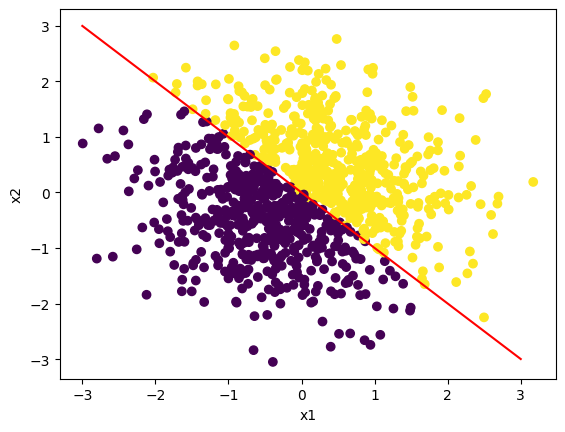

In [7]:
#### TWÓJ KOD TUTAJ
import numpy as np
import matplotlib.pyplot as plt

N = 1000  # Wielkość próbki
x, d = generate_data(N)

eta = 0.1  # Współczynnik uczenia
tol = 0.1  # Tolerancja błędu
w0 = np.zeros(3)  # Inicjalizacja wag

weights = train(x, d, eta, tol, w0)

# Wykres danych
plt.scatter(x[:, 1], x[:, 2], c=d)
plt.xlabel('x1')
plt.ylabel('x2')

# Linia separująca
x1_plot = np.linspace(-3, 3, 100)
x2_plot = (-weights[0] - weights[1] * x1_plot) / weights[2]
plt.plot(x1_plot, x2_plot, color='red')

plt.show()



&copy; Katedra Informatyki, Politechnika Krakowska